In [5]:
import h5py
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from Bio import SeqIO, AlignIO
from collections import defaultdict


In [25]:
db = SeqIO.parse("data/ADK1075_proteomics_DB_2.fasta", "fasta")
db_lens = defaultdict(list)
for record in db:
    db_lens[len(record.seq)].append(record)
db_lens = dict(db_lens)

utp = list(SeqIO.parse("data/uTP_HMM_hits.fasta", "fasta"))
utp_lens = np.array([len(record.seq) for record in utp])
mu = np.mean(utp_lens)
sigma = np.std(utp_lens)
utp = [record for record in utp if mu - 3 * sigma <= len(record.seq) <= mu + 3 * sigma]
utp_lens = np.array([len(record.seq) for record in utp])

control = []
for _ in range(len(utp_lens)):
    l = int(np.random.normal(mu, sigma))
    closest = min(db_lens.keys(), key=lambda x: abs(x - l))
    chosen_rec_idx = random.randint(0, len(db_lens[closest]) - 1)
    chosen_rec = db_lens[closest].pop(chosen_rec_idx)
    if len(db_lens[closest]) == 0:
        del db_lens[closest]
    control.append(chosen_rec)

In [26]:
control_lens = np.array([len(rec.seq) for rec in control])

print(f"uTP: {len(utp_lens)}, mu: {mu}, sigma: {sigma}")
print(f"Control: {len(control_lens)}, mu: {np.mean(control_lens)}, sigma: {np.std(control_lens)}")

uTP: 726, mu: 600.6825613079019, sigma: 233.7891905300554
Control: 726, mu: 609.8650137741047, sigma: 231.64647464776007


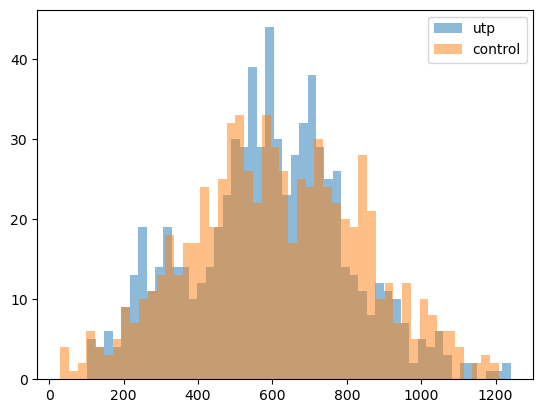

In [27]:
plt.hist(utp_lens, bins=50, alpha=0.5, label="utp")
plt.hist(control_lens, bins=50, alpha=0.5, label="control")
plt.legend()

In [28]:
# Write to file
SeqIO.write(utp, "embeddings/uTP_HMM_hits_filtered.fasta", "fasta")
SeqIO.write(control, "embeddings/control.fasta", "fasta")

726